In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
dp =pd.read_csv(r'C:\Users\USER\Desktop\Portfolio\london-borough-profiles-2016 Data set.csv')

In [9]:
dp.head()

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2016,GLA Household Estimate 2016,Inland Area (Hectares),Population density (per hectare) 2016,"Average Age, 2016","Proportion of population aged 0-15, 2016",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2014/15,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,E09000001,E09000001,City of London,Inner London,"8,548","5,179",290.4,28.9,42.9,27.2,...,5.99,5.57,NaN,2.6,128.8,.,.,.,.,.
1,E09000002,E09000002,Barking and Dagenham,Outer London,"205,773","76,841","3,610.80",57.3,32.9,21.0,...,7.05,3.05,25.3,7.3,227.6,Lab,0,100,0,36.5
2,E09000003,E09000003,Barnet,Outer London,"385,108","149,147","8,674.80",44.5,37.2,21.0,...,7.37,2.75,18.4,6.0,133.8,Cons,50.8,47.6,1.6,40.5
3,E09000004,E09000004,Bexley,Outer London,"243,303","97,233","6,058.10",39.9,38.9,20.8,...,7.21,3.29,21.4,6.9,164.3,Cons,71.4,23.8,0,39.6
4,E09000005,E09000005,Brent,Outer London,"328,568","119,166","4,323.30",76.1,35.5,20.1,...,7.22,2.92,23.9,7.9,169.4,Lab,9.5,88.9,1.6,36.3


In [11]:
print(dp.dtypes)

Code                                                         object
New code                                                     object
Area name                                                    object
Inner/ Outer London                                          object
GLA Population Estimate 2016                                 object
                                                              ...  
Political control in council                                 object
Proportion of seats won by Conservatives in 2014 election    object
Proportion of seats won by Labour in 2014 election           object
Proportion of seats won by Lib Dems in 2014 election         object
Turnout at 2014 local elections                              object
Length: 85, dtype: object


In [13]:
for col in dp.columns:
    pct_missing = np.mean(dp[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Code - 3%
New code - 3%
Area name - 0%
Inner/ Outer London - 15%
GLA Population Estimate 2016 - 0%
GLA Household Estimate 2016 - 0%
Inland Area (Hectares) - 0%
Population density (per hectare) 2016 - 0%
Average Age, 2016 - 0%
Proportion of population aged 0-15, 2016 - 0%
Proportion of population of working-age, 2016 - 0%
Proportion of population aged 65 and over, 2016 - 0%
Net internal migration (2014) - 0%
Net international migration (2014) - 0%
Net natural change (2014) - 0%
% of resident population born abroad (2014) - 0%
Largest migrant population by country of birth (2011) - 0%
% of largest migrant population (2011) - 0%
Second largest migrant population by country of birth (2011) - 0%
% of second largest migrant population (2011) - 0%
Third largest migrant population by country of birth (2011) - 0%
% of third largest migrant population (2011) - 0%
% of population from BAME groups (2016) - 0%
% people aged 3+ whose main language is not English (2011 Census) - 0%
Overseas nationals

In [27]:
dp['GLA Population Estimate 2016 numeric'] = LabelEncoder().fit_transform(dp['GLA Population Estimate 2016'])

In [33]:
# Using factorize - this assigns a random numeric value for each unique categorical value

dp.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2016,GLA Household Estimate 2016,Inland Area (Hectares),Population density (per hectare) 2016,"Average Age, 2016","Proportion of population aged 0-15, 2016",...,Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2014/15,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections,GLA Population Estimate 2016 numeric
Code,1.000000,1.000000,0.850000,-0.453805,0.864021,0.864021,0.864021,0.841671,0.743386,0.739682,...,0.657547,0.618877,0.388113,0.865094,0.026377,0.643279,0.688811,0.455717,0.569933,0.864021
New code,1.000000,1.000000,0.850000,-0.453805,0.864021,0.864021,0.864021,0.841671,0.743386,0.739682,...,0.657547,0.618877,0.388113,0.865094,0.026377,0.643279,0.688811,0.455717,0.569933,0.864021
Area name,0.850000,0.850000,1.000000,-0.616549,0.999630,0.999630,0.999630,0.985583,0.900043,0.894616,...,0.804365,0.766524,0.550828,0.997928,-0.083527,0.530936,0.561742,0.380798,0.445584,0.999630
Inner/ Outer London,-0.453805,-0.453805,-0.616549,1.000000,-0.612691,-0.612691,-0.612691,-0.570421,-0.611329,-0.669675,...,-0.444656,-0.347843,-0.256088,-0.594945,0.453116,-0.064845,-0.119369,-0.194279,-0.025488,-0.612691
GLA Population Estimate 2016,0.864021,0.864021,0.999630,-0.612691,1.000000,1.000000,1.000000,0.985421,0.898591,0.893213,...,0.802715,0.764552,0.546487,0.998429,-0.078466,0.540657,0.572452,0.387478,0.455296,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Proportion of seats won by Conservatives in 2014 election,0.643279,0.643279,0.530936,-0.064845,0.540657,0.540657,0.540657,0.518893,0.426669,0.484165,...,0.303108,0.526405,0.294189,0.565154,0.258553,1.000000,0.909279,0.630920,0.767947,0.540657
Proportion of seats won by Labour in 2014 election,0.688811,0.688811,0.561742,-0.119369,0.572452,0.572452,0.572452,0.555575,0.419577,0.539575,...,0.360003,0.581273,0.335742,0.600569,0.236080,0.909279,1.000000,0.625081,0.871620,0.572452
Proportion of seats won by Lib Dems in 2014 election,0.455717,0.455717,0.380798,-0.194279,0.387478,0.387478,0.387478,0.336470,0.418258,0.434741,...,0.222109,0.403188,0.133099,0.398702,-0.058459,0.630920,0.625081,1.000000,0.496024,0.387478
Turnout at 2014 local elections,0.569933,0.569933,0.445584,-0.025488,0.455296,0.455296,0.455296,0.430922,0.352184,0.464296,...,0.241197,0.442107,0.378902,0.485898,0.368445,0.767947,0.871620,0.496024,1.000000,0.455296


In [35]:
dp.apply(lambda x: x.factorize()[0]).corr(method='kendall')

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2016,GLA Household Estimate 2016,Inland Area (Hectares),Population density (per hectare) 2016,"Average Age, 2016","Proportion of population aged 0-15, 2016",...,Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2014/15,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections,GLA Population Estimate 2016 numeric
Code,1.000000,1.000000,0.897436,-0.364960,0.902093,0.902093,0.902093,0.866217,0.725328,0.716049,...,0.686109,0.663510,0.406293,0.891749,-0.049585,0.626231,0.742209,0.258011,0.612786,0.902093
New code,1.000000,1.000000,0.897436,-0.364960,0.902093,0.902093,0.902093,0.866217,0.725328,0.716049,...,0.686109,0.663510,0.406293,0.891749,-0.049585,0.626231,0.742209,0.258011,0.612786,0.902093
Area name,0.897436,0.897436,1.000000,-0.477518,0.996624,0.996624,0.996624,0.968920,0.826219,0.816595,...,0.789161,0.763919,0.507184,0.991885,-0.155366,0.530727,0.647228,0.151143,0.517675,0.996624
Inner/ Outer London,-0.364960,-0.364960,-0.477518,1.000000,-0.477841,-0.477841,-0.477841,-0.445717,-0.444521,-0.528851,...,-0.340993,-0.277782,-0.213646,-0.478812,0.495024,0.022414,-0.099453,0.071384,-0.034341,-0.477841
GLA Population Estimate 2016,0.902093,0.902093,0.996624,-0.477841,1.000000,1.000000,1.000000,0.965517,0.825413,0.814427,...,0.785624,0.761719,0.504798,0.989846,-0.155471,0.531086,0.647665,0.151245,0.518025,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Proportion of seats won by Conservatives in 2014 election,0.626231,0.626231,0.530727,0.022414,0.531086,0.531086,0.531086,0.500023,0.410751,0.420333,...,0.316661,0.489719,0.279807,0.536270,0.237277,1.000000,0.869698,0.517055,0.734896,0.531086
Proportion of seats won by Labour in 2014 election,0.742209,0.742209,0.647228,-0.099453,0.647665,0.647665,0.647665,0.616853,0.477045,0.546449,...,0.434901,0.604366,0.355042,0.653064,0.181139,0.869698,1.000000,0.500410,0.859290,0.647665
Proportion of seats won by Lib Dems in 2014 election,0.258011,0.258011,0.151143,0.071384,0.151245,0.151245,0.151245,0.116186,0.161950,0.218268,...,0.053688,0.247135,0.067865,0.156145,0.074792,0.517055,0.500410,1.000000,0.427314,0.151245
Turnout at 2014 local elections,0.612786,0.612786,0.517675,-0.034341,0.518025,0.518025,0.518025,0.487082,0.424162,0.487004,...,0.329011,0.476776,0.388472,0.525890,0.297873,0.734896,0.859290,0.427314,1.000000,0.518025


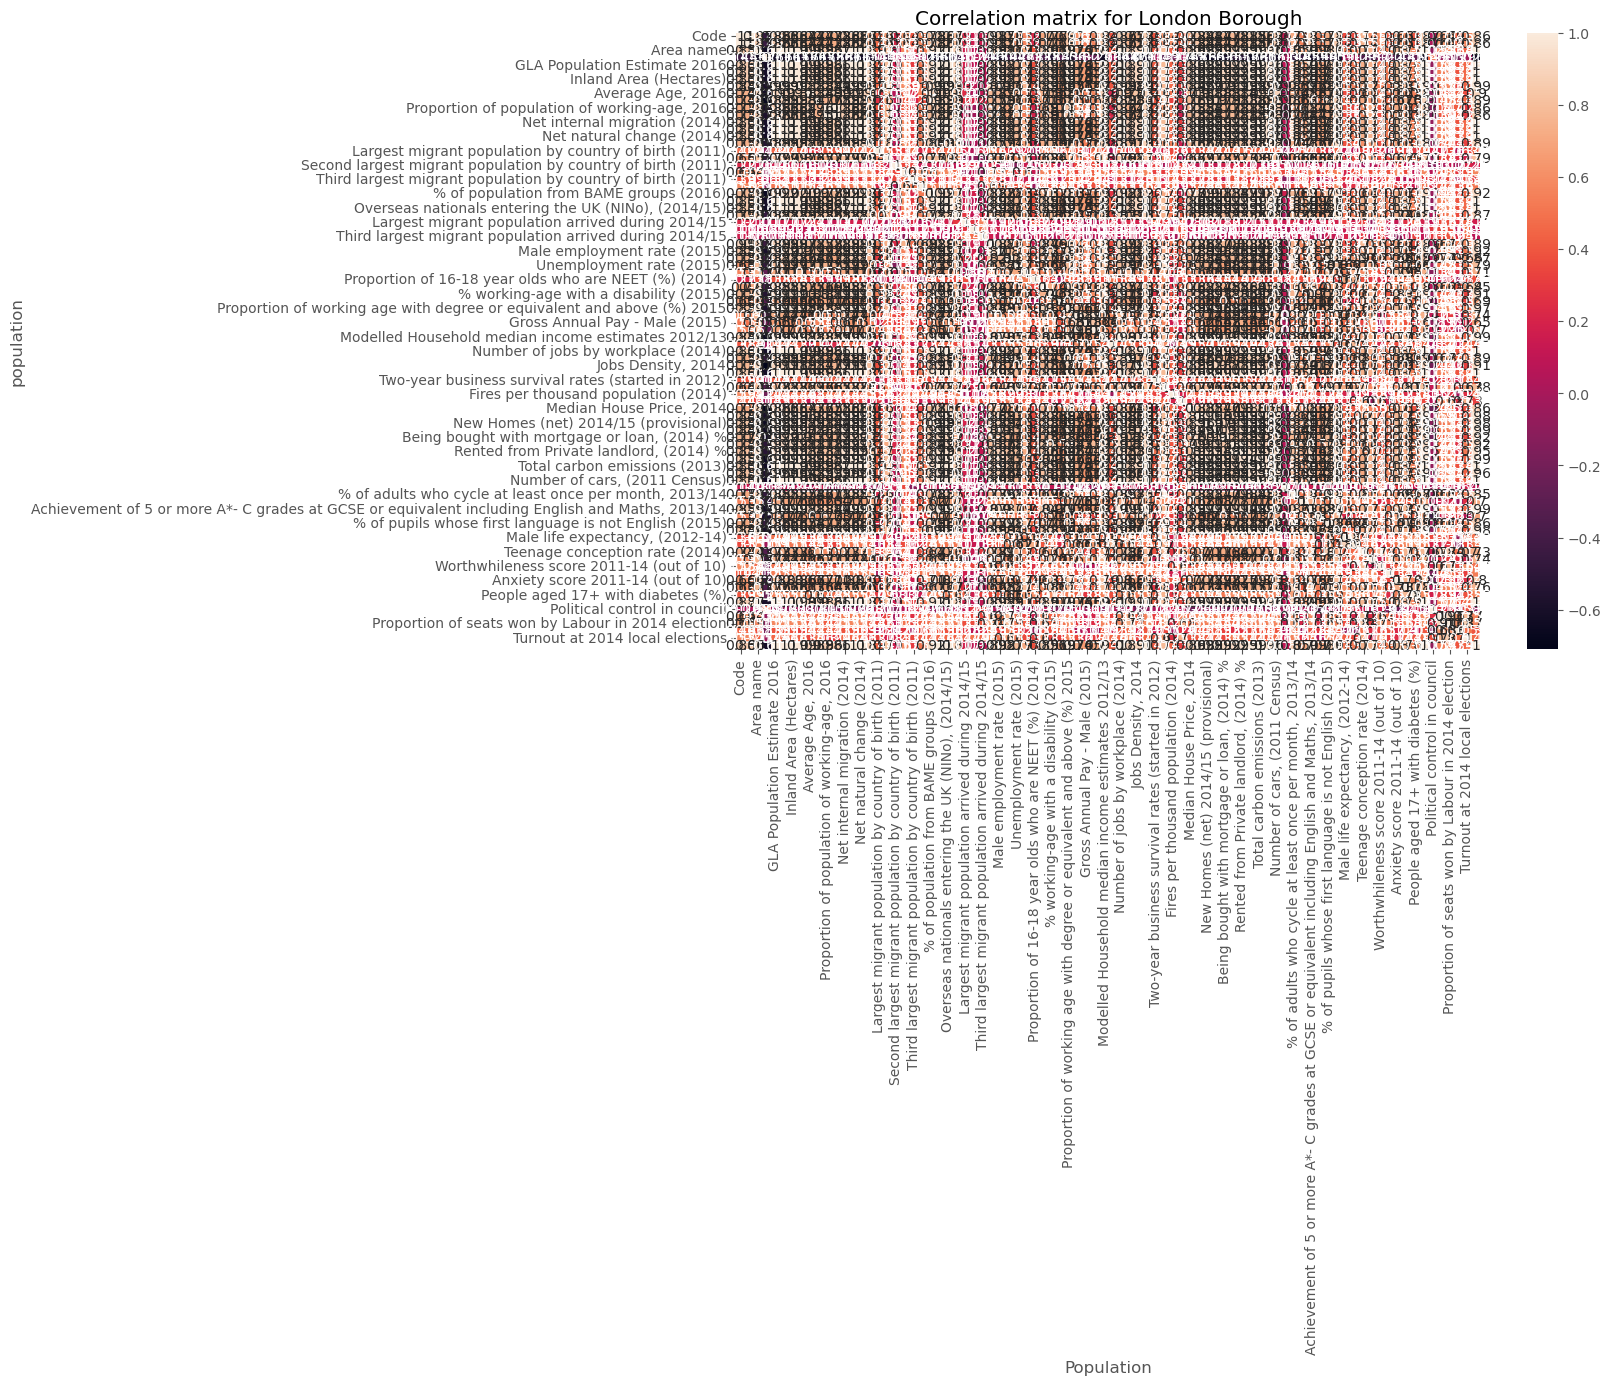

In [37]:
correlation_matrix = dp.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for London Borough")

plt.xlabel("Population")

plt.ylabel("population")

plt.show()